# Project 1: Explore Weather Trends

**Extract the data** from the database. There's a workspace in the next section that is connected to a database. You’ll need to export the temperature data for the world as well as for the closest big city to where you live. You can find a list of cities and countries in the city_list table. To interact with the database, you'll need to write a SQL query.
<ul>
    <li>Write a SQL query to extract the city level data. Export to CSV.</li>
    <li>Write a SQL query to extract the global data. Export to CSV.</li>
</ul>

I executed this SQL query `select * from city_list` and extract the data to *city_list.csv*<br/>
I executed this SQL query `select * from city_data` and extract the data to *city_data.csv*<br/>
I executed this SQL query `select * from global_data` and extract the data to *global_data.csv*

**Open up the CSV** in whatever tool you feel most comfortable using. We suggest using Excel or Google sheets, but you are welcome to use another tool, such as Python or R.

In [1]:
import pandas as pd

city_list = pd.read_csv('../data/global_temperatue/city_list.csv')
city_data = pd.read_csv('../data/global_temperatue/city_data.csv')
global_data = pd.read_csv('../data/global_temperatue/global_data.csv')

<ul><li><b>Prepare my city data</b>: Jakarta.</li></ul>

In [2]:
jkt_data = city_data.query('country=="Indonesia" & city=="Jakarta"')
jkt_data.head()

,year,city,country,avg_temp
28654,1825,Jakarta,Indonesia,26.38
28655,1826,Jakarta,Indonesia,NaN
28656,1827,Jakarta,Indonesia,NaN
28657,1828,Jakarta,Indonesia,NaN
28658,1829,Jakarta,Indonesia,NaN


<ul><li><b>Explore data</b>: Check data quality of Jakarta data and Global data.</li></ul>

In [3]:
jkt_data.shape

(189, 4)

In [4]:
# Check duplicates
jkt_data.duplicated().any(), global_data.duplicated().any()

(False, False)

In [5]:
# Check missing data
jkt_data.isna().any(), global_data.isna().any()

(year        False
 city        False
 country     False
 avg_temp     True
 dtype: bool,
 year        False
 avg_temp    False
 dtype: bool)

In [6]:
# Number of row with missing data in avg_temp column
print("There are {} missing data in jkt_data['avg_temp'].".format(jkt_data['avg_temp'].isna().sum()))

There are 30 missing data in jkt_data['avg_temp'].


<ul><li><b>Calculate 10-year moving average temperature and temperature differences between Jakarta and the world.</b></li></ul>

In [7]:
# Moving average Jakarta temp
ma10y_temp = jkt_data.iloc[:,3:].rolling(window=10).mean()
ma10y_temp.rename(columns={'avg_temp':'ma10y_temp'},inplace=True)
jkt_final_data = jkt_data.merge(ma10y_temp, left_index=True, right_index=True, how='inner')

In [8]:
# Moving average global temp
ma10y_temp = global_data.iloc[:,1:].rolling(window=10).mean()
ma10y_temp.rename(columns={'avg_temp':'ma10y_temp'},inplace=True)
global_final_data = global_data.merge(ma10y_temp, left_index=True, right_index=True, how='inner')

In [9]:
# Rename Jakarta columns
jkt_final_data.rename(columns=lambda x: x+'_jkt', inplace=True)

In [10]:
# Join global data and Jakarta data
df_combined = global_final_data.merge(jkt_final_data, left_on='year', right_on='year_jkt', how='inner')
df_combined['diff_avg_temp'] = df_combined['avg_temp_jkt'] - df_combined['avg_temp']
df_combined.drop(['year_jkt','city_jkt','country_jkt'], axis=1, inplace=True)
df_combined.head()

,year,avg_temp,ma10y_temp,avg_temp_jkt,ma10y_temp_jkt,diff_avg_temp
0,1825,8.39,7.768,26.38,NaN,17.99
1,1826,8.36,7.910,NaN,NaN,NaN
2,1827,8.81,8.093,NaN,NaN,NaN
3,1828,8.17,8.127,NaN,NaN,NaN
4,1829,7.94,8.184,NaN,NaN,NaN


**Create a line chart** that compares your city’s temperatures with the global temperatures. Make sure to plot the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable (the last concept in the previous lesson goes over how to do this in a spreadsheet).

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

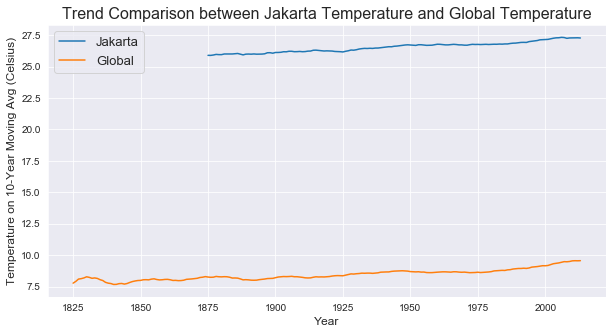

In [12]:
plt.figure(figsize=(10,5));
plt.plot(df_combined.year, df_combined.ma10y_temp_jkt, label='Jakarta');
plt.plot(df_combined.year, df_combined.ma10y_temp, label='Global');
plt.legend(fontsize=13);
plt.xlabel('Year', fontsize=12);
plt.ylabel('Temperature on 10-Year Moving Avg (Celsius)', fontsize=12);
plt.title('Trend Comparison between Jakarta Temperature and Global Temperature', fontsize=16);

**Make observations** about the similarities and differences between the world averages and your city’s averages, as well as overall trends. Here are some questions to get you started.

### Q1: Is there correlation between global average temperature and Jakarta average temperature?

In [13]:
df_combined.dropna().year.unique()

array([1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885,
       1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896,
       1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907,
       1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918,
       1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929,
       1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940,
       1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=int64)

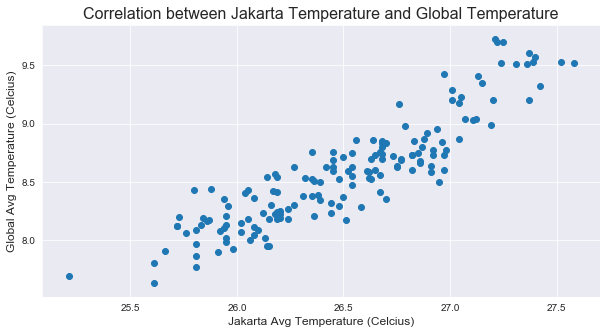

In [14]:
plt.figure(figsize=(10,5));
plt.scatter(df_combined['avg_temp_jkt'],df_combined['avg_temp']);
plt.title('Correlation between Jakarta Temperature and Global Temperature', fontsize=16);
plt.xlabel('Jakarta Avg Temperature (Celcius)', fontsize=12);
plt.ylabel('Global Avg Temperature (Celcius)', fontsize=12);

Based on temperature data in 1875-2013, Jakarta average temperature and global average temperature have a _positive correlation_.

### Q2: Is Jakarta hotter or cooler on average compared to the global average? Has the difference been consistent over time?

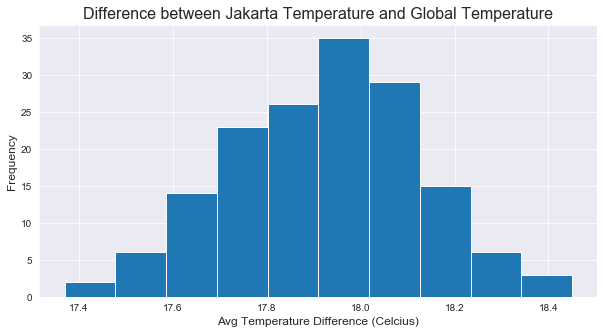

In [15]:
plt.figure(figsize=(10,5));
plt.hist(df_combined['diff_avg_temp'].dropna());
plt.title('Difference between Jakarta Temperature and Global Temperature', fontsize=16);
plt.xlabel('Avg Temperature Difference (Celcius)', fontsize=12);
plt.ylabel('Frequency', fontsize=12);

In [16]:
df_combined['diff_avg_temp'].describe()

count    159.000000
mean      17.923145
std        0.210326
min       17.370000
25%       17.790000
50%       17.950000
75%       18.070000
max       18.450000
Name: diff_avg_temp, dtype: float64

Jakarta is hotter on average compared to the global average temperature in 1875-2013. The average temperature difference between Jakarta and global is 17.92 Celsius and standar deviation is equal to 0.21, which means the difference has been consistent over time.

### Q3: What does the overall trend look like? Is the world getting hotter or cooler?

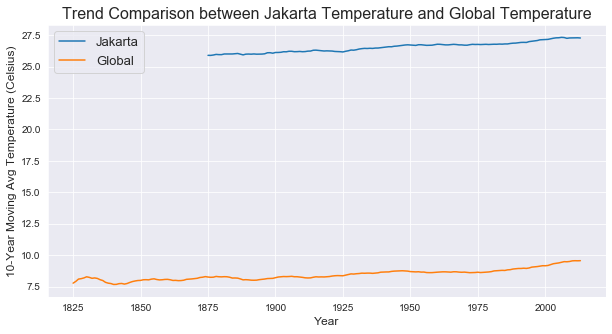

In [17]:
plt.figure(figsize=(10,5));
plt.plot(df_combined.year, df_combined.ma10y_temp_jkt, label='Jakarta');
plt.plot(df_combined.year, df_combined.ma10y_temp, label='Global');
plt.legend(fontsize=13);
plt.xlabel('Year', fontsize=12);
plt.ylabel('10-Year Moving Avg Temperature (Celsius)', fontsize=12);
plt.title('Trend Comparison between Jakarta Temperature and Global Temperature', fontsize=16);

The overall temperature trends either Jakarta or the world (global) are getting hotter.

### Q4: What was the proportion of temperature increases on 10-year moving averages in last 3 decade?

In [18]:
df_combined50 = df_combined.query('year % 10 == 0 & year>= 1980').dropna()
df_shift1 = df_combined50.iloc[:,[2,4]].shift(1)
df_shift1.rename(columns={'ma10y_temp':'prev_ma10y_temp','ma10y_temp_jkt':'prev_ma10y_temp_jkt'}, inplace=True)
df_shift1.head()

,prev_ma10y_temp,prev_ma10y_temp_jkt
155,NaN,NaN
165,8.686,26.767
175,8.936,26.893
185,9.153,27.154


In [19]:
df_combined10=df_combined50.merge(df_shift1, left_index=True, right_index=True, how='inner').dropna()
df_combined10['year']

165    1990
175    2000
185    2010
Name: year, dtype: int64

In [20]:
growth_temp_jkt = (df_combined10.ma10y_temp_jkt-df_combined10.prev_ma10y_temp_jkt)/df_combined10.prev_ma10y_temp_jkt
growth_temp = (df_combined10.ma10y_temp-df_combined10.prev_ma10y_temp)/df_combined10.prev_ma10y_temp
growth_temp_jkt, growth_temp

(165    0.004707
 175    0.009705
 185    0.004714
 dtype: float64,
 165    0.028782
 175    0.024284
 185    0.042609
 dtype: float64)

In [21]:
df_combined10['year'].astype(str)

165    1990
175    2000
185    2010
Name: year, dtype: object

In [22]:
import numpy as np

labels = df_combined10['year'].astype(str)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

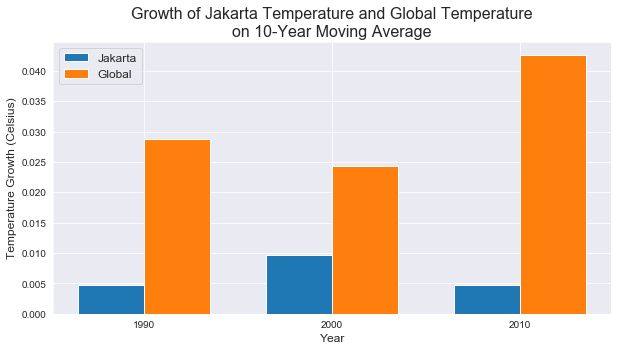

In [23]:
fig, ax = plt.subplots(figsize=(10,5));
ax.bar(x - width/2, growth_temp_jkt, width, label='Jakarta');
ax.bar(x + width/2, growth_temp, width, label='Global');
ax.set_xlabel('Year', fontsize=12);
ax.set_ylabel('Temperature Growth (Celsius)', fontsize=12);
ax.set_title('Growth of Jakarta Temperature and Global Temperature\non 10-Year Moving Average', fontsize=16);
ax.set_xticks(x);
ax.set_xticklabels(labels);
ax.legend(fontsize=12);

In last 3 decade (1990, 2000, 2010), Jakarta has growth of 10-year moving average temperature less than the world (global).